# Úkol č. 2 - předzpracování dat a binární klasifikace (do 9. listopadu 23:59)

  * V rámci tohoto úkolu se musíte vypořádat s příznaky, které jsou různých typů.
  * Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Zdroj dat

Budeme se zabývat predikcí přežití pasažérů Titaniku.
K dispozici máte trénovací data v souboru **data.csv** a data na vyhodnocení v souboru **evaluation.csv**.

#### Seznam příznaků:
* survived - zda přežil, 0 = Ne, 1 = Ano, **vysvětlovaná proměnná**, kterou chcete predikovat
* pclass - Třída lodního lístku, 1 = první, 2 = druhá, 3 = třetí
* name - jméno
* sex - pohlaví
* age - věk v letech
* sibsp	- počet sourozenců / manželů, manželek na palubě
* parch - počet rodičů / dětí na palubě
* ticket - číslo lodního lístku
* fare - cena lodního lístku
* cabin	- číslo kajuty
* embarked	- místo nalodění, C = Cherbourg, Q = Queenstown, S = Southampton
* home.dest - Bydliště/Cíl

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **8 bodů**:
  * V Jupyter notebooku načtěte data ze souboru **data.csv**. Vhodným způsobem si je rozdělte na podmnožiny vhodné k trénování modelu.
  * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném klasifikačním modelu.
  * Podle potřeby si můžete vytvářet nové příznaky (na základě existujících), například tedy můžete vytvořit příznak měřící délku jména. Některé příznaky můžete také úplně zahodit.
  * Nějakým způsobem se vypořádejte s chybějícími hodnotami.
  * Následně si vyberte vhodný klasifikační model z přednášek. Najděte vhodné hyperparametry a určete jeho přesnost (accuracy) na trénovací množině. Také určete jeho přesnost na testovací množině.
  * Načtěte vyhodnocovací data ze souboru **evaluation.csv**. Napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte **results.csv** soubor, ve kterém tyto predikce uložíte do dvou sloupců: ID, predikce přežití. Tento soubor nahrajte do repozitáře.
  * Ukázka prvních řádků souboru *results.csv*:
  
```
ID,survived
1000,0
1001,1
...
```

**Další body zadání** za případné další body  (můžete si vybrat, maximum bodů za úkol je každopádně 12 bodů):
  * (až +4 body) Aplikujte všechny klasifikační modely z přednášek a určete (na základě přesnosti na validační množině), který je nejlepší. Přesnost tohoto nejlepšího modelu odhadněte pomocí křížové validace. K predikcím na vyhodnocovacích datech využijte tento model.
  * (až +4 body) Zkuste použít nějaké (alespoň dvě) netriviální metody doplňování chybějících hodnot u věku. Zaměřte na vliv těchto metod na přesnost predikce výsledného modelu. K predikcím na vyhodnocovacích datech využijte ten přístup, který Vám vyjde jako nejlepší.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte nejen Jupyter Notebook, ale i _csv_ soubor s predikcemi pro vyhodnocovací data (`results.csv`).
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni**

In [407]:
import math
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

### Zpracovani dat
Odstranila jsem sloubce cabin, home.dest, ticket, ID aby oni nemeli vliv na sravnost prace modelu 

In [408]:
models_name = []
model_cross_val = []
models_test = []
data = pd.read_csv('data.csv')
data.index = data.ID
data = data.drop(columns = "cabin")
data = data.drop(columns = "home.dest")
data = data.drop(columns = "ID")
data = data.drop(columns = "ticket")
data

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
ID,,,,,,,,,
0,1,3,"Dorking, Mr. Edward Arthur",male,19.0,0,0,8.0500,S
1,1,2,"Smith, Miss. Marion Elsie",female,40.0,0,0,13.0000,S
2,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,6.7500,Q
3,0,3,"Sage, Mr. John George",male,NaN,1,9,69.5500,S
4,0,3,"Cacic, Miss. Marija",female,30.0,0,0,8.6625,S
...,...,...,...,...,...,...,...,...,...
995,0,3,"Sdycoff, Mr. Todor",male,NaN,0,0,7.8958,S
996,1,3,"Finoli, Mr. Luigi",male,NaN,0,0,7.0500,S
997,0,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,14.4000,S


### Rozdelim data na trenovaci a testovaci

In [409]:
dt = DecisionTreeClassifier()
dt.get_params

Xdata = data.drop(columns='survived')
ydata = data.survived


In [410]:

rd_seed = 333 

Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.25, random_state=rd_seed) 
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.25, random_state=rd_seed) 


### Doplneni hodnot
Pomoci mean trenovacich dat vyplnim NaN hodnoty v trenovaci, validacni a testovaci mnozine

In [411]:
mean = (Xtrain['age'].mean())
Xtrain['age'] = Xtrain['age'].fillna(mean)
Xval['age'] = Xval['age'].fillna(mean)
Xtest['age'] = Xtest['age'].fillna(mean)


<ipython-input-411-292ad4d13e95>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtest['age'] = Xtest['age'].fillna(mean)


In [412]:
Xtrain_string_cols = Xtrain.select_dtypes(['object']).columns
Xtrain[Xtrain_string_cols] = Xtrain[Xtrain_string_cols].astype('category').apply(lambda x:x.cat.codes)
Xval_string_cols = Xval.select_dtypes(['object']).columns
Xval[Xval_string_cols] = Xval[Xval_string_cols].astype('category').apply(lambda x:x.cat.codes)
Xtest_string_cols = Xtest.select_dtypes(['object']).columns
Xtest[Xtest_string_cols] = Xtest[Xtest_string_cols].astype('category').apply(lambda x:x.cat.codes)

/home/viktoriia/anaconda3/envs/vzd/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [413]:
Xtest

,pclass,name,sex,age,sibsp,parch,fare,embarked
ID,,,,,,,,
981,3,148,1,29.391941,0,0,7.2292,0
755,2,14,1,28.000000,0,0,26.0000,2
730,3,135,1,34.500000,0,0,6.4375,0
278,3,221,0,22.000000,0,0,9.8375,2
600,3,122,0,29.391941,1,0,14.4542,0
...,...,...,...,...,...,...,...,...
491,3,144,1,32.000000,0,0,7.5792,2
125,3,179,1,16.000000,0,0,9.2167,2
7,1,225,0,29.391941,1,0,52.0000,2


### Ladění hyperparameterů

In [414]:
val_acc = []
train_acc = []
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
param_grid = ParameterGrid({
    'criterion': ['entropy', 'gini'],
    'max_depth': range(1, 31),
    'random_state': [rd_seed],
})

for params in param_grid:
    dt = DecisionTreeClassifier(max_depth=params['max_depth'],
                                criterion=params['criterion'],
                                random_state = params['random_state']
                               )
    dt.fit(Xtrain, ytrain)
    train_acc.append(metrics.accuracy_score(ytrain, dt.predict(Xtrain)))
    val_acc.append(metrics.accuracy_score(yval, dt.predict(Xval)))

### Vizualizace rozhodnuti decision tree
vsechny modely budu testovat pomoci cross validation

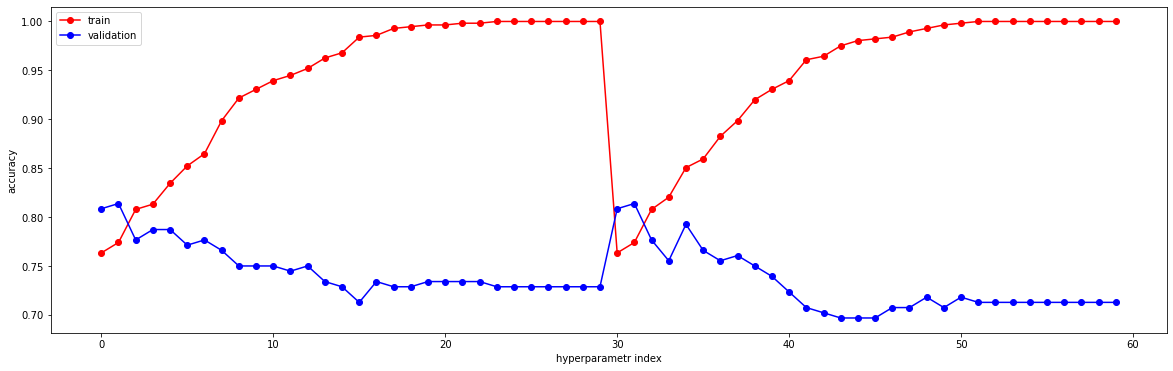

In [415]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,6))
plt.plot(train_acc,'or-') #o: body, r: barva, -: spojení bodů linkou
plt.plot(val_acc,'ob-')
plt.xlabel('hyperparametr index')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

In [416]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
%matplotlib inline
best_params = param_grid[np.argmax(val_acc)]

dt = DecisionTreeClassifier(**best_params)
train_predict=[]
test_predict=[]
print('accuracy score (cross validation): {0:.6f}'.format(cross_val_score(dt , Xtrain , ytrain).mean()))
models_name.append("Decision tree")
model_cross_val.append(cross_val_score(dt , Xtrain , ytrain).mean())
dt.fit(Xtrain, ytrain)
train_predict.append(metrics.accuracy_score(ytrain, dt.predict(Xtrain)))
test_predict.append(metrics.accuracy_score(yval, dt.predict(Xval)))
print('accuracy score (train): {0:.3f}'.format(metrics.accuracy_score(ytrain, dt.predict(Xtrain))))
print('accuracy score (validation): {0:.6f}'.format(metrics.accuracy_score(yval, dt.predict(Xval))))

print('accuracy score (test): {0:.3f}'.format(metrics.accuracy_score(ytest, dt.predict(Xtest))))
models_test.append(metrics.accuracy_score(ytest, dt.predict(Xtest)))


accuracy score (cross validation): 0.736694
accuracy score (train): 0.774
accuracy score (validation): 0.813830
accuracy score (test): 0.764


### Ada Boost
Testujeme Ada Boost přesnost klasifikátoru se 100 odhady

In [417]:
from sklearn.ensemble import AdaBoostClassifier
boost = AdaBoostClassifier(n_estimators=100, random_state=rd_seed)
print('accuracy score (cross validation): {0:.6f}'.format(cross_val_score(boost , Xtrain , ytrain ).mean()))
models_name.append("Ada boost")
model_cross_val.append(cross_val_score(boost , Xtrain , ytrain).mean())
boost.fit(Xtrain , ytrain)
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, boost.predict(Xtrain))))
print('accuracy score (validation): {0:.6f}'.format(metrics.accuracy_score(yval, boost.predict(Xval))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, boost.predict(Xtest))))
models_test.append(metrics.accuracy_score(ytest, boost.predict(Xtest)))


accuracy score (cross validation): 0.731258
accuracy score (train): 0.827402
accuracy score (validation): 0.765957
accuracy score (test): 0.760000


### Support vector machines¶

Vyzkoušime výchozí přesnost klasifikátoru SVM

In [418]:
from sklearn import svm
svm_model = svm.SVC()
print('accuracy score (cross validation): {0:.6f}'.format(cross_val_score(svm_model , Xtrain , ytrain ).mean()))
models_name.append("SVM")
model_cross_val.append(cross_val_score(svm_model , Xtrain , ytrain).mean())
svm_model.fit(Xtrain , ytrain)
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, svm_model.predict(Xtrain))))
print('accuracy score (validation): {0:.6f}'.format(metrics.accuracy_score(yval, svm_model.predict(Xval))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, svm_model.predict(Xtest))))
models_test.append(metrics.accuracy_score(ytest, svm_model.predict(Xtest)))

accuracy score (cross validation): 0.637042
accuracy score (train): 0.645907
accuracy score (validation): 0.648936
accuracy score (test): 0.624000


### K-neighbors classifier

Otestujeme přesnost klasifikátoru K-sousedů s 10 sousedy


In [419]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 10)
print('accuracy score (cross validation): {0:.6f}'.format(cross_val_score(kn, Xtrain, ytrain ).mean()))
models_name.append("K-neighbors")
model_cross_val.append(cross_val_score(kn , Xtrain , ytrain).mean())
kn.fit(Xtrain , ytrain)
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, kn.predict(Xtrain))))
print('accuracy score (validation): {0:.6f}'.format(metrics.accuracy_score(yval, kn.predict(Xval))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, kn.predict(Xtest))))
models_test.append(metrics.accuracy_score(ytest, kn.predict(Xtest)))

accuracy score (cross validation): 0.660161
accuracy score (train): 0.709964
accuracy score (validation): 0.664894
accuracy score (test): 0.656000


### Gaussian Naive Bayes

Otestujte výchozí přesnost klasifikátoru GaussianNB

In [420]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
print('accuracy score (cross validation): {0:.6f}'.format(cross_val_score(gnb , Xtrain , ytrain).mean()))
models_name.append("Gaussian Naive Bayes")
model_cross_val.append(cross_val_score(gnb , Xtrain , ytrain).mean())
gnb.fit(Xtrain , ytrain)
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, gnb.predict(Xtrain))))
print('accuracy score (validation): {0:.6f}'.format(metrics.accuracy_score(yval, gnb.predict(Xval))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, gnb.predict(Xtest))))
models_test.append(metrics.accuracy_score(ytest, gnb.predict(Xtest)))

accuracy score (cross validation): 0.765092
accuracy score (train): 0.763345
accuracy score (validation): 0.792553
accuracy score (test): 0.780000


### Random forest
Test default random forest classifier accuracy
Otestujte výchozí přesnost klasifikátoru random forest

In [421]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
print('accuracy score (cross validation): {0:.6f}'.format(cross_val_score(forest , Xtrain , ytrain ).mean()))
models_name.append("Random forest")
model_cross_val.append(cross_val_score(forest , Xtrain , ytrain).mean())
forest.fit(Xtrain , ytrain)
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, forest.predict(Xtrain))))
print('accuracy score (validation): {0:.6f}'.format(metrics.accuracy_score(yval, forest.predict(Xval))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, forest.predict(Xtest))))
models_test.append(metrics.accuracy_score(ytest, forest.predict(Xtest)))

accuracy score (cross validation): 0.758091
accuracy score (train): 1.000000
accuracy score (validation): 0.803191
accuracy score (test): 0.728000


### Nejlepsi model

Na základě přesnosti cross validation a přesnosti modelu na testovacích datech je nejlepším modelem klasifikátor Random Forest, nyní vyladíme hyper parametry pro model podle mřížky parametrů.


In [422]:
all_models = pd.DataFrame(
{
  "Name":   models_name,
  "Cross val accuracy": model_cross_val, 
  "Test accuracy": models_test
        
})

all_models

,Name,Cross val accuracy,Test accuracy
0,Decision tree,0.736694,0.764
1,Ada boost,0.731258,0.760
2,SVM,0.637042,0.624
3,K-neighbors,0.660161,0.656
4,Gaussian Naive Bayes,0.765092,0.780
5,Random forest,0.766972,0.728


In [423]:
param_grid = ParameterGrid({
    'n_estimators': range(50, 201 , 50),
    'max_depth': range(1,31 , 1),
    'criterion': ['entropy', 'gini'],
    'max_features':['sqrt' , 'log2']
})

val_acc = []

for params in param_grid:
    forest = RandomForestClassifier( n_estimators = params['n_estimators'] ,
                                    max_depth = params['max_depth'] ,
                                    criterion = params['criterion']  
                                    , max_features = params['max_features'])
    
    val_acc.append(cross_val_score(forest , Xtrain , ytrain).mean())
best_params = param_grid[np.argmax(val_acc)]
forest = RandomForestClassifier(**best_params)
print('accuracy score (cross validation): {0:.6f}'.format(cross_val_score(forest , Xtrain , ytrain).mean()))
forest.fit(Xtrain , ytrain)
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, forest.predict(Xtrain))))
print('accuracy score (validation): {0:.6f}'.format(metrics.accuracy_score(yval, forest.predict(Xval))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, forest.predict(Xtest))))

accuracy score (cross validation): 0.758012
accuracy score (train): 0.967972
accuracy score (validation): 0.803191
accuracy score (test): 0.748000


### Zpracovani evaluation dat
odstranila jsem stejne sloupce jako i v trenovacich.
Pak vyplnila jsen NaN hodnoty pomoci mean trenovacich dat.

In [424]:
evl = pd.read_csv('evaluation.csv')
evl.index = evl.ID
evl = evl.drop(columns = "cabin")
evl = evl.drop(columns = "home.dest")
evl = evl.drop(columns = "ID")
evl = evl.drop(columns = "ticket")

mean_fare = Xtrain['fare'].mean()
evl['age'] = evl['age'].fillna(mean)
evl['fare'] = evl['fare'].fillna(mean_fare)

string_cols = evl.select_dtypes(['object']).columns
evl[string_cols] = evl[string_cols].astype('category').apply(lambda x:x.cat.codes)

print(evl.head())

      pclass  name  sex   age  sibsp  parch  fare  embarked
ID                                                         
1000       2   144    0  24.0      2      1  27.0         2
1001       2    59    0  25.0      1      1  30.0         2
1002       2   109    1  38.0      1      0  21.0         2
1003       3   192    0  19.0      1      0  16.1         2
1004       2   137    0  60.0      1      0  26.0         2


In [425]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestClassifier(**best_params)
forest.fit(Xtrain , ytrain)
predict = forest.predict(evl)


raw_data = {'ID': evl.index, 
    'survived': predict}
df = pd.DataFrame(raw_data, columns = ['ID', 'survived'])

print(df)
df.to_csv("results.csv",index=False)

       ID  survived
0    1000         1
1    1001         1
2    1002         0
3    1003         1
4    1004         1
..    ...       ...
304  1304         1
305  1305         1
306  1306         0
307  1307         1
308  1308         0

[309 rows x 2 columns]
